
Bad key text.latex.unicode in file /Users/fukai/.matplotlib/stylelib/paper-default2.mplstyle, line 46 ('text.latex.unicode: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution
Duplicate key in file PosixPath('/Users/fukai/.matplotlib/stylelib/paper-default.mplstyle'), line 38 ('legend.framealpha: 1.0')
findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.


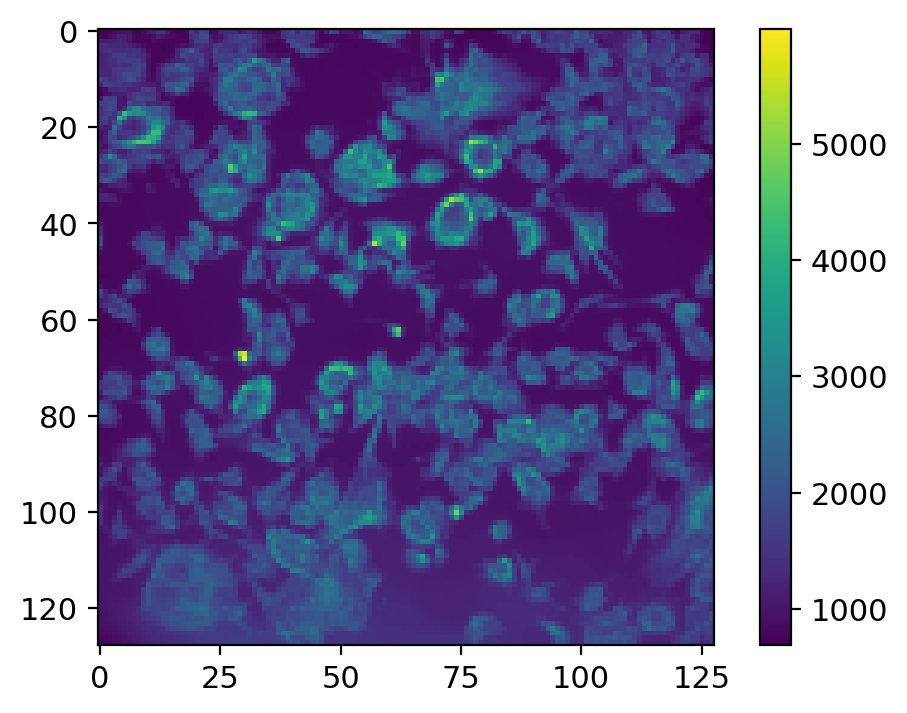

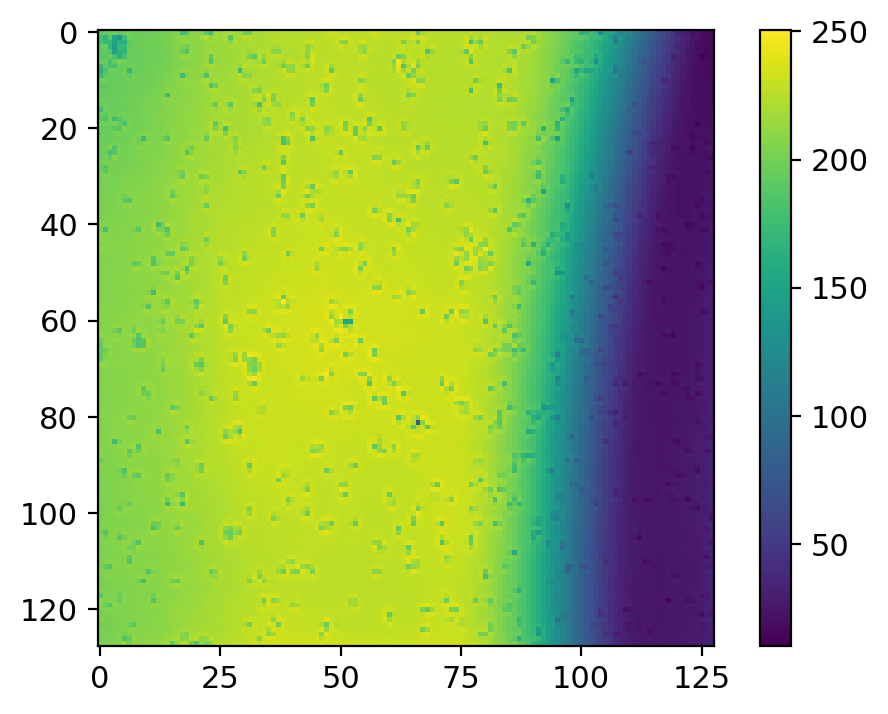

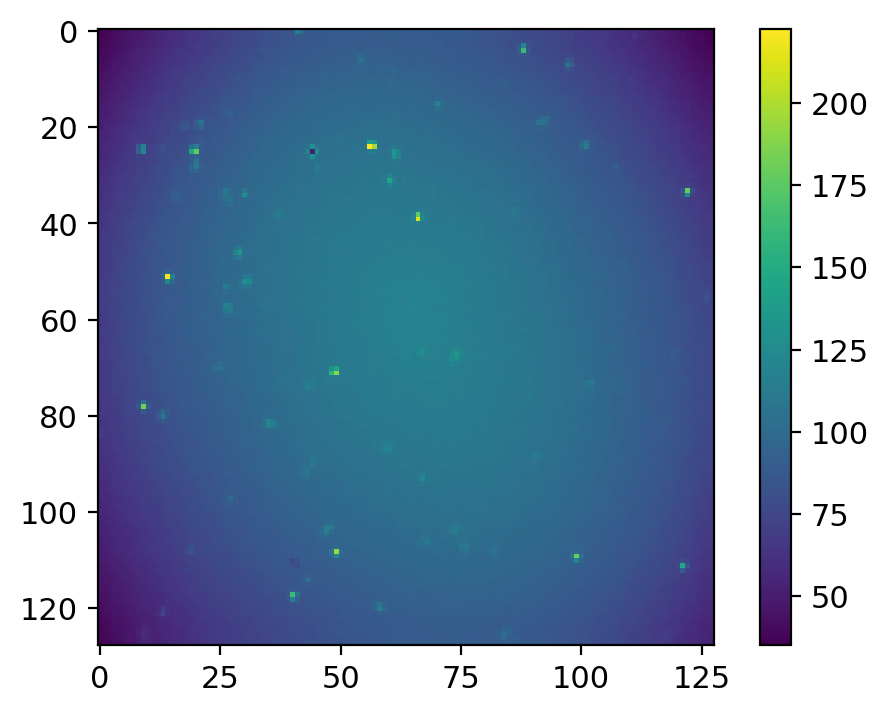

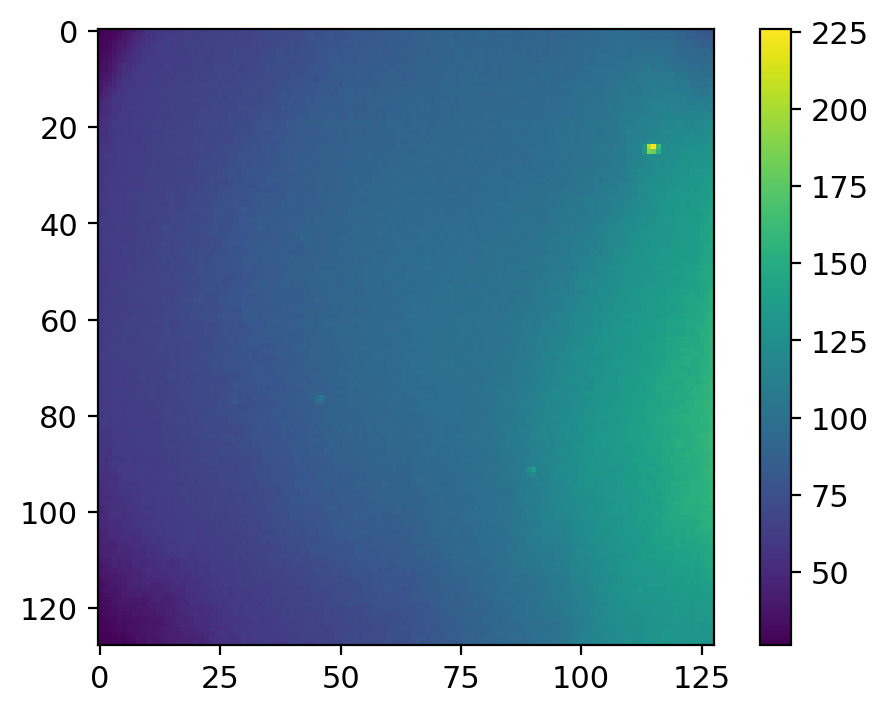

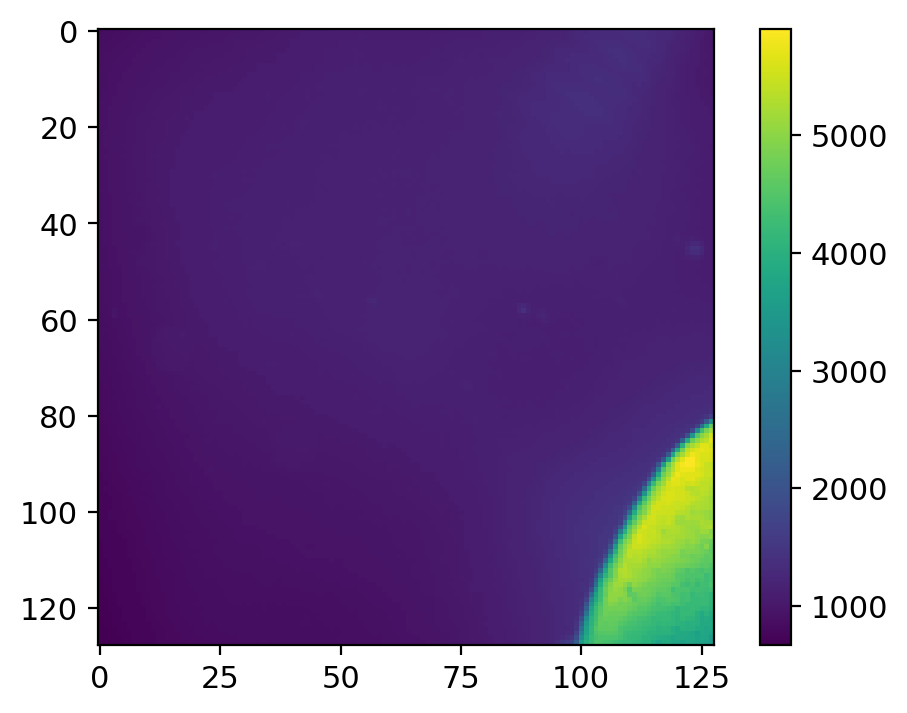

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize as skresize
import sys
sys.path.append("../")
RESIZE_ORDER = 1
RESIZE_MODE = "symmetric"
_preserve_range = True

keys = ["cell_culture","timelapse_brightfield","timelapse_nanog","timelapse_pu1","wsi_brain"]
def _resize_images_list(images_list, 
                        side_size: float = None, 
                        x_side_size: float = None, 
                        y_side_size: float = None):
    if side_size is not None:
        y_side_size = x_side_size = side_size
    resized_images_list = []
    for i, im in enumerate(images_list):
        if im.shape[0] != x_side_size or im.shape[1] != y_side_size:
            resized_images_list.append(skresize(
                im, 
                (x_side_size, y_side_size), 
                order = RESIZE_ORDER, 
                mode = RESIZE_MODE,
                preserve_range = _preserve_range
                )
            )
        else:
            resized_images_list.append(im)
    return resized_images_list

imagess = {}
for k in keys:
    images = np.load("../ExampleData/{}.npz".format(k))["images"]
    images=_resize_images_list(images,side_size=128)
    imagess[k] = np.array(images).astype(np.float32)
    plt.imshow(images[10])
    plt.colorbar()
    plt.show()

In [2]:
np.min(images)

10

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 6
reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5


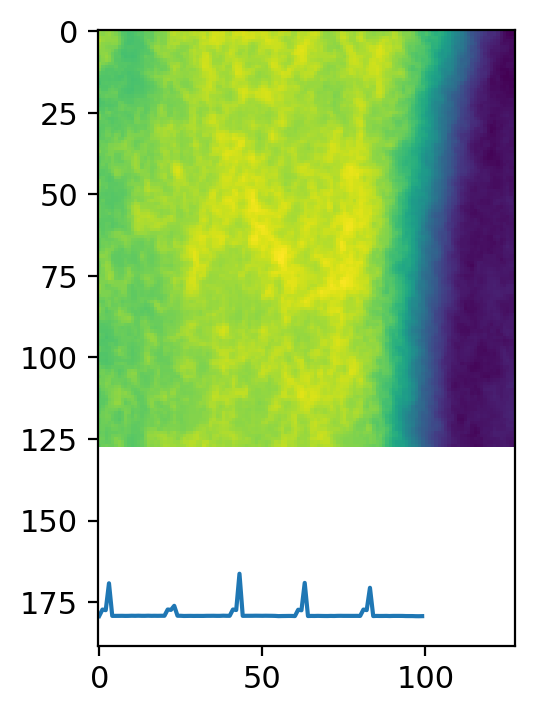

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5


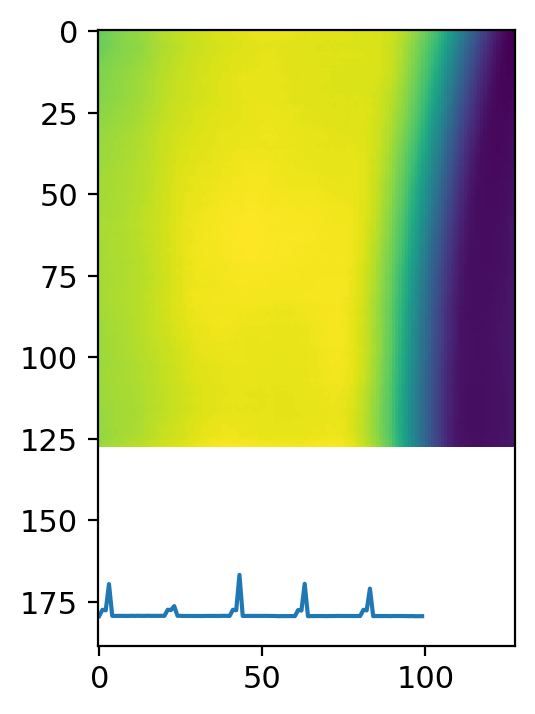

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 6
reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5


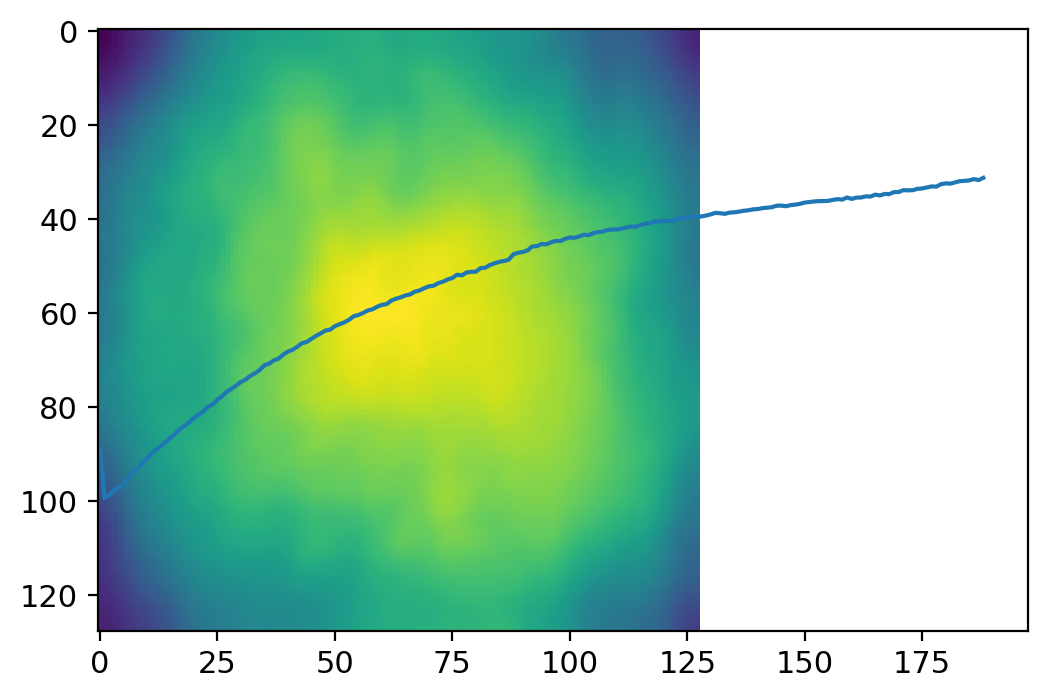

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5


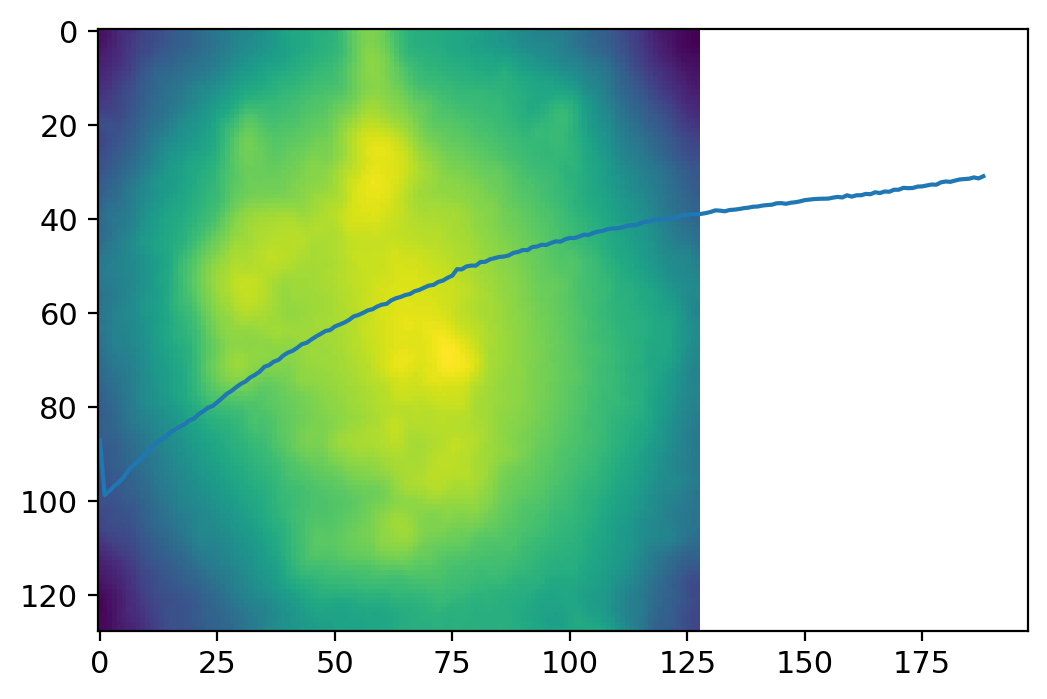

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 6
reweighting_iter: 7
reweighting_iter: 8
reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4


In [3]:
import pybasic
res={}
for k,images in list(imagess.items())[1:]:
    flatfield,darkfield=pybasic.basic(images,verbosity=True,darkfield=True)
    baseline = pybasic.background_timelapse(images,flatfield,darkfield)
    plt.imshow(flatfield)
    plt.show()
    plt.plot(baseline)
    plt.show()
    res[k]={"flatfield":flatfield,"darkfield":darkfield,"baseline":baseline}
    flatfield,darkfield=pybasic.basic(images,verbosity=True,darkfield=False)
    baseline = pybasic.background_timelapse(images,flatfield,darkfield)
    plt.imshow(flatfield)
    plt.show()
    plt.plot(baseline)
    plt.show()
    res[k]={"flatfield-flatonly":flatfield,"darkfield-flatonly":darkfield,"baseline-flatonly":baseline}

np.savez_compressed("../ExampleData/reference_results.npz",**res)